In [1]:
import numpy as np
import pandas as pd
import datetime as dt
from pathlib import Path
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [2]:
import tensorflow
tensorflow.keras.__version__
from sklearn.preprocessing import LabelEncoder, MinMaxScaler, StandardScaler

# READ THE CSV AND PERFORM DATA PROCESSING# 

In [3]:
columns =[
    "EVENT","ZIPCODES","CITIES","YEAR","MONTH","RAINFALL","FLOODZONE","STORM","AVERAGE HOUSEPRICE"
]

target =["HOUSEPRICE_VARIATION"]


In [4]:
# Load the data
import os 
file_path = os.path.join("Resources","Newbrunswick_ML.csv")
#file_path = Path('.\Resources\Newbrunswick_ML.csv')
df = pd.read_csv(file_path,encoding="utf-8")
df

,EVENT,ZIPCODES,CITIES,YEAR,MONTH,RAINFALL(avg),FLOODZONE,STORM,AVERAGE HOUSEPRICE(label)
0,NaN,8901,NEWBRUNSWICK,2020.0,1,2.01,NO,NO,285731
1,NaN,8901,NEWBRUNSWICK,NaN,2,3.08,NO,NO,287630
2,NaN,8901,NEWBRUNSWICK,NaN,3,4.54,NO,NO,287675
3,NaN,8901,NEWBRUNSWICK,NaN,4,4.20,NO,NO,288403
4,NaN,8901,NEWBRUNSWICK,NaN,5,2.33,NO,NO,287621
5,NaN,8901,NEWBRUNSWICK,NaN,6,2.91,NO,NO,287116
6,NaN,8901,NEWBRUNSWICK,NaN,7,11.39,NO,NO,286919
7,NaN,8901,NEWBRUNSWICK,NaN,8,5.72,NO,NO,290307
8,NaN,8901,NEWBRUNSWICK,NaN,9,4.61,NO,NO,295746
9,NaN,8901,NEWBRUNSWICK,NaN,10,5.66,NO,NO,302915


In [5]:
# Learn more about our data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29 entries, 0 to 28
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   EVENT                      1 non-null      object 
 1   ZIPCODES                   29 non-null     int64  
 2   CITIES                     29 non-null     object 
 3   YEAR                       3 non-null      float64
 4   MONTH                      29 non-null     int64  
 5   RAINFALL(avg)              29 non-null     object 
 6   FLOODZONE                  29 non-null     object 
 7   STORM                      29 non-null     object 
 8   AVERAGE HOUSEPRICE(label)  29 non-null     int64  
dtypes: float64(1), int64(3), object(5)
memory usage: 2.2+ KB


In [6]:
df['FLOODZONE'].replace(['YES','NO'],[1,0],inplace=True)


In [7]:
df

,EVENT,ZIPCODES,CITIES,YEAR,MONTH,RAINFALL(avg),FLOODZONE,STORM,AVERAGE HOUSEPRICE(label)
0,NaN,8901,NEWBRUNSWICK,2020.0,1,2.01,0,NO,285731
1,NaN,8901,NEWBRUNSWICK,NaN,2,3.08,0,NO,287630
2,NaN,8901,NEWBRUNSWICK,NaN,3,4.54,0,NO,287675
3,NaN,8901,NEWBRUNSWICK,NaN,4,4.20,0,NO,288403
4,NaN,8901,NEWBRUNSWICK,NaN,5,2.33,0,NO,287621
5,NaN,8901,NEWBRUNSWICK,NaN,6,2.91,0,NO,287116
6,NaN,8901,NEWBRUNSWICK,NaN,7,11.39,0,NO,286919
7,NaN,8901,NEWBRUNSWICK,NaN,8,5.72,0,NO,290307
8,NaN,8901,NEWBRUNSWICK,NaN,9,4.61,0,NO,295746
9,NaN,8901,NEWBRUNSWICK,NaN,10,5.66,0,NO,302915


In [8]:
#df['STORM'].replace(['YES','NO'],[1,0],inplace=True)
df.columns

Index(['EVENT', 'ZIPCODES', 'CITIES', 'YEAR', 'MONTH', 'RAINFALL(avg) ',
       'FLOODZONE', 'STORM ', 'AVERAGE HOUSEPRICE(label)'],
      dtype='object')

In [9]:
df = df.rename(columns={"STORM " : "STORM"})

In [10]:
df['STORM'].replace(['YES','NO'],[1,0],inplace=True)
df

,EVENT,ZIPCODES,CITIES,YEAR,MONTH,RAINFALL(avg),FLOODZONE,STORM,AVERAGE HOUSEPRICE(label)
0,NaN,8901,NEWBRUNSWICK,2020.0,1,2.01,0,0,285731
1,NaN,8901,NEWBRUNSWICK,NaN,2,3.08,0,0,287630
2,NaN,8901,NEWBRUNSWICK,NaN,3,4.54,0,0,287675
3,NaN,8901,NEWBRUNSWICK,NaN,4,4.20,0,0,288403
4,NaN,8901,NEWBRUNSWICK,NaN,5,2.33,0,0,287621
5,NaN,8901,NEWBRUNSWICK,NaN,6,2.91,0,0,287116
6,NaN,8901,NEWBRUNSWICK,NaN,7,11.39,0,0,286919
7,NaN,8901,NEWBRUNSWICK,NaN,8,5.72,0,0,290307
8,NaN,8901,NEWBRUNSWICK,NaN,9,4.61,0,0,295746
9,NaN,8901,NEWBRUNSWICK,NaN,10,5.66,0,0,302915


In [11]:
import numpy as np
import pandas as pd

df['EVENT'] = df['EVENT'].fillna(0)
df['YEAR'] = df['YEAR'].fillna(0)
df



,EVENT,ZIPCODES,CITIES,YEAR,MONTH,RAINFALL(avg),FLOODZONE,STORM,AVERAGE HOUSEPRICE(label)
0,0,8901,NEWBRUNSWICK,2020.0,1,2.01,0,0,285731
1,0,8901,NEWBRUNSWICK,0.0,2,3.08,0,0,287630
2,0,8901,NEWBRUNSWICK,0.0,3,4.54,0,0,287675
3,0,8901,NEWBRUNSWICK,0.0,4,4.20,0,0,288403
4,0,8901,NEWBRUNSWICK,0.0,5,2.33,0,0,287621
5,0,8901,NEWBRUNSWICK,0.0,6,2.91,0,0,287116
6,0,8901,NEWBRUNSWICK,0.0,7,11.39,0,0,286919
7,0,8901,NEWBRUNSWICK,0.0,8,5.72,0,0,290307
8,0,8901,NEWBRUNSWICK,0.0,9,4.61,0,0,295746
9,0,8901,NEWBRUNSWICK,0.0,10,5.66,0,0,302915


In [12]:
import numpy as np
import pandas as pd

df['EVENT'] = df['EVENT'].replace('IDA', 1)
df['CITIES'] = df['CITIES'].replace('NEWBRUNSWICK', 1)

df

,EVENT,ZIPCODES,CITIES,YEAR,MONTH,RAINFALL(avg),FLOODZONE,STORM,AVERAGE HOUSEPRICE(label)
0,0,8901,1,2020.0,1,2.01,0,0,285731
1,0,8901,1,0.0,2,3.08,0,0,287630
2,0,8901,1,0.0,3,4.54,0,0,287675
3,0,8901,1,0.0,4,4.20,0,0,288403
4,0,8901,1,0.0,5,2.33,0,0,287621
5,0,8901,1,0.0,6,2.91,0,0,287116
6,0,8901,1,0.0,7,11.39,0,0,286919
7,0,8901,1,0.0,8,5.72,0,0,290307
8,0,8901,1,0.0,9,4.61,0,0,295746
9,0,8901,1,0.0,10,5.66,0,0,302915


In [13]:
df.head()


,EVENT,ZIPCODES,CITIES,YEAR,MONTH,RAINFALL(avg),FLOODZONE,STORM,AVERAGE HOUSEPRICE(label)
0,0,8901,1,2020.0,1,2.01,0,0,285731
1,0,8901,1,0.0,2,3.08,0,0,287630
2,0,8901,1,0.0,3,4.54,0,0,287675
3,0,8901,1,0.0,4,4.20,0,0,288403
4,0,8901,1,0.0,5,2.33,0,0,287621


In [14]:
df.describe()



,EVENT,ZIPCODES,CITIES,YEAR,MONTH,FLOODZONE,STORM,AVERAGE HOUSEPRICE(label)
count,29.000000,29.0,29.0,29.000000,29.000000,29.000000,29.000000,29.000000
mean,0.034483,8901.0,1.0,209.068966,5.896552,0.034483,0.034483,319380.517241
std,0.185695,0.0,0.0,626.376765,3.518774,0.185695,0.185695,25219.369452
min,0.000000,8901.0,1.0,0.000000,1.000000,0.000000,0.000000,285731.000000
25%,0.000000,8901.0,1.0,0.000000,3.000000,0.000000,0.000000,290307.000000
50%,0.000000,8901.0,1.0,0.000000,5.000000,0.000000,0.000000,319290.000000
75%,0.000000,8901.0,1.0,0.000000,9.000000,0.000000,0.000000,342244.000000
max,1.000000,8901.0,1.0,2022.000000,12.000000,1.000000,1.000000,358706.000000


# Exploring Dataset

In [15]:
df.columns

Index(['EVENT', 'ZIPCODES', 'CITIES', 'YEAR', 'MONTH', 'RAINFALL(avg) ',
       'FLOODZONE', 'STORM', 'AVERAGE HOUSEPRICE(label)'],
      dtype='object')

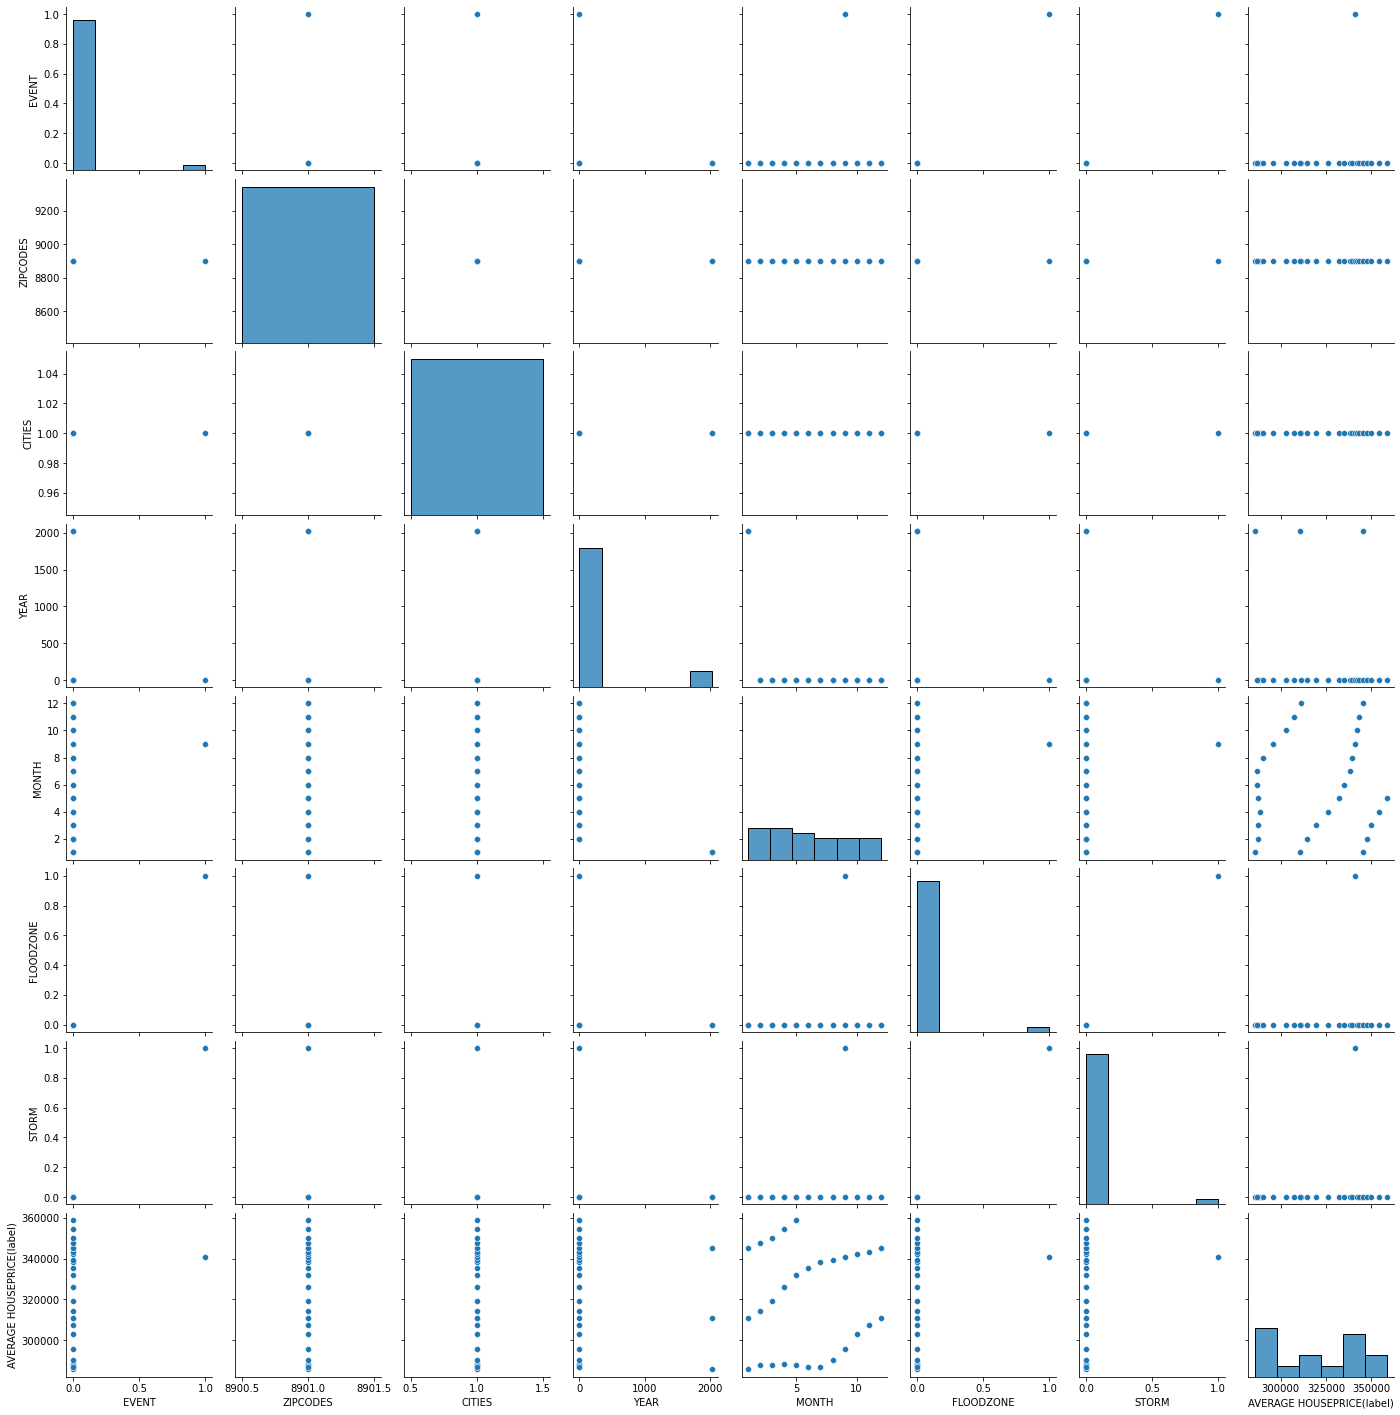

In [16]:
sns.pairplot(df)

<AxesSubplot:>

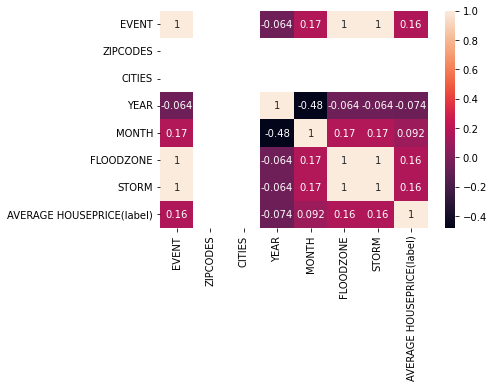

In [17]:
sns.heatmap(df.corr(),annot=True)

In [18]:
X = df[['EVENT', 'ZIPCODES', 'CITIES', 'YEAR', 'MONTH', 'RAINFALL(avg) ',
       'FLOODZONE', 'STORM']]
y = df['AVERAGE HOUSEPRICE(label)']

In [19]:
from sklearn.model_selection import train_test_split

In [20]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.40,random_state=101)

In [21]:
from sklearn.linear_model import LinearRegression

In [22]:
lm = LinearRegression()

In [23]:
lm.fit(X_train, y_train)

LinearRegression()

In [25]:
predictions = lm.predict(X_test)

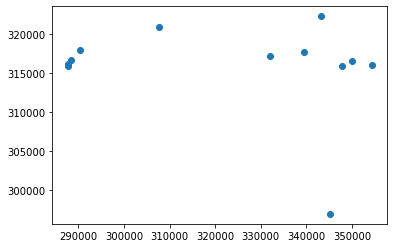

In [26]:
plt.scatter(y_test,predictions)

C:\Users\archa\.conda\envs\mlenv\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


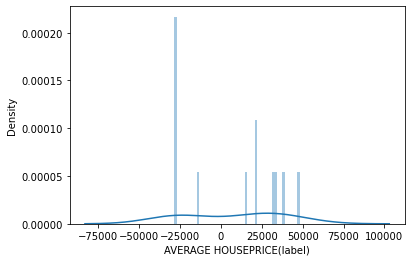

In [27]:
sns.distplot((y_test-predictions),bins=50);